In [1]:
import os
import re
import glob
import nibabel as nib

In [43]:
import pandas as pd

In [8]:
from fast_mri_view import *

In [36]:
smooth = 1.
def dice_coef(y_true, y_pred):
    y_true_f = y_true.flatten()
    y_pred_f = y_pred.flatten()
    intersection = np.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (np.sum(y_true_f) + np.sum(y_pred_f) + smooth)

In [27]:
def filter_brain(scan):
    scan = nib.load(scan).get_data()
    scan_int = scan.astype(int)
    non_zero = scan_int!=0
    non_zero = non_zero.astype(int)
    return non_zero

In [91]:
#load scans
nifti_dir = '/mnt/projects/charite-brains/original/niftis/'
df = pd.DataFrame(columns=['ID', 't1', 't2', 't2f', 'flair'])

for p in glob.glob(nifti_dir + '*/*/*reg.nii.gz'):
    subject = p.split('/')[6]
    modality = p.split('/')[7]
    scan = filter_brain(p)
    ref = nifti_dir + subject + '/t1c/t1c_brain.nii.gz'
    ref = filter_brain(ref)
    d = dice_coef(ref, scan)
    df = df.append({'ID':subject, modality:d}, ignore_index=True)
        

In [ ]:
#here is where you left it. Groupby?

In [120]:
ndf = df.copy()

In [126]:
ndf.head(20)

,ID,t1,t2,t2f,flair
0,mr636,0.911886,NaN,NaN,NaN
1,mr636,NaN,NaN,0.910559,NaN
2,mr636,NaN,0.912166,NaN,NaN
3,mr636,NaN,NaN,NaN,0.918285
4,mr462,NaN,NaN,NaN,0.927800
5,mr462,0.942001,NaN,NaN,NaN
6,mr462,NaN,NaN,0.922787,NaN
7,mr462,NaN,0.899114,NaN,NaN
8,mr403,NaN,NaN,NaN,0.950097
9,mr403,NaN,NaN,0.937577,NaN


In [127]:
ndf = ndf.groupby('ID').mean()

In [136]:
ndf = ndf[['ID', 't1', 't2', 't2f', 'flair']]

In [139]:
ndf.reset_index(drop=True, inplace=True)

In [142]:
ndf.mean()

t1       0.913714
t2       0.907236
t2f      0.922434
flair    0.927626
dtype: float64

In [143]:
ndf.min()

ID          mr403
t1       0.111574
t2       0.870213
t2f      0.884806
flair    0.868856
dtype: object

In [144]:
ndf.max()

ID          mr640
t1       0.976187
t2       0.952409
t2f      0.955537
flair    0.971644
dtype: object

In [145]:
ndf.median()

t1       0.928416
t2       0.905158
t2f      0.922514
flair    0.926831
dtype: float64

In [154]:
ndf.to_csv('/home/Shahryar.Khorasani/netstore/tms/registration_dice_score.csv',index=False)

In [148]:
ndf[ndf.t1<0.92]

,ID,t1,t2,t2f,flair
2,mr406,0.916155,NaN,0.906833,0.936596
15,mr449,0.907773,NaN,0.915881,0.929837
29,mr490,0.911765,NaN,0.905455,0.872320
37,mr505,0.914678,0.899709,NaN,0.901769
44,mr522,0.911181,0.886384,0.906848,0.920247
45,mr523,0.916995,0.871290,0.902633,0.925930
48,mr536,0.919964,NaN,NaN,0.945028
49,mr539,0.111574,NaN,0.930851,0.918415
63,mr563,0.903842,NaN,0.904220,0.907037
64,mr566,0.899190,NaN,0.900846,0.909821


In [150]:
ndf[ndf.t2<.90]

,ID,t1,t2,t2f,flair
4,mr415,0.926624,0.892405,0.921583,0.915140
5,mr416,0.940912,0.887695,0.918951,0.916595
6,mr419,0.940287,0.896818,0.937350,0.934027
21,mr462,0.942001,0.899114,0.922787,0.927800
22,mr464,0.937776,0.895208,0.912005,0.925693
27,mr485,0.931319,0.870213,0.886157,0.911602
34,mr498,0.930570,0.899341,0.884806,0.971644
37,mr505,0.914678,0.899709,NaN,0.901769
44,mr522,0.911181,0.886384,0.906848,0.920247
45,mr523,0.916995,0.871290,0.902633,0.925930


In [152]:
ndf[ndf.t2f<.92]

,ID,t1,t2,t2f,flair
2,mr406,0.916155,NaN,0.906833,0.936596
5,mr416,0.940912,0.887695,0.918951,0.916595
7,mr426,0.936490,NaN,0.909951,0.914877
9,mr431,0.935970,NaN,0.916526,0.935619
11,mr440,NaN,NaN,0.886816,0.927693
15,mr449,0.907773,NaN,0.915881,0.929837
17,mr455,0.928416,0.901010,0.918533,0.929809
22,mr464,0.937776,0.895208,0.912005,0.925693
26,mr477,NaN,NaN,0.914678,0.922021
27,mr485,0.931319,0.870213,0.886157,0.911602


In [75]:
ndf.drop_duplicates(inplace=True)

In [79]:
ndf

,ID,t1,t2,t2f,flair
0,mr636,0.911886,NaN,NaN,NaN
1,mr636,0.911886,NaN,0.910559,NaN
2,mr636,0.911886,0.912166,0.910559,NaN
3,mr636,0.911886,0.912166,0.910559,0.918285
4,mr462,0.911886,0.912166,0.910559,0.927800
5,mr462,0.942001,0.912166,0.910559,0.927800
6,mr462,0.942001,0.912166,0.922787,0.927800
7,mr462,0.942001,0.899114,0.922787,0.927800
8,mr403,0.942001,0.899114,0.922787,0.950097
9,mr403,0.942001,0.899114,0.937577,0.950097


In [30]:
t1c = '/mnt/projects/charite-brains/original/niftis/mr503/t1c/t1c_brain.nii.gz'
t1 = '/mnt/projects/charite-brains/original/niftis/mr503/t1/t1_reg.nii.gz'
t2f =  '/mnt/projects/charite-brains/original/niftis/mr503/t2f/t2f_reg.nii.gz'

In [31]:
t1c_f = filter_brain(t1c)
t1_f = filter_brain(t1)
t2f_f = filter_brain(t2f)

In [49]:
df = pd.DataFrame(columns=['ID', 't1', 't2', 't2f', 'flair'])

In [41]:
dice_coef(t1_f, t2f_f)

0.9169423256458655

In [156]:
flair_brts = '/mnt/dsets/brats/train/Brats18_2013_14_1/Brats18_2013_14_1_flair.nii.gz'
t1_brts = '/mnt/dsets/brats/train/Brats18_2013_14_1/Brats18_2013_14_1_t1.nii.gz'
t1c_brts = '/mnt/dsets/brats/train/Brats18_2013_14_1/Brats18_2013_14_1_t1ce.nii.gz'

In [157]:
flair_brts = filter_brain(flair_brts)
t1_brts    = filter_brain(t1_brts)
t1c_brts   = filter_brain(t1c_brts)

In [160]:
dice_coef(t1c_brts, flair_brts)

0.9968453520456433

In [161]:
dice_coef(t1c_brts, t1_brts)

0.9976478773323368

In [162]:
def rigid_register(subject_dir, registration_reference='t1c'):        
        
        #rigid registration with fsl
    ref = subject_dir + '/' + registration_reference + '/' + registration_reference + '_ras' 
    for modality in os.listdir(subject_dir):
        if modality != registration_reference and modality != 'seg':
            scan_masked = subject_dir + '/' + modality + '/' + modality + '_ras'
            reg_scan = subject_dir + '/' + modality + '/' + modality + '_reg_ras'
            affine_matrix = subject_dir + '/' + modality + '/' + modality + '_to_' + registration_reference + '_affine_matrix.mat'
            register = 'flirt -in ' + scan_masked + ' -ref ' + ref +  ' -out ' + reg_scan + ' -omat ' + affine_matrix 
            
            os.system(register)

In [163]:
rigid_register('/home/Shahryar.Khorasani/netstore/tms/charite_scan_example/mr426/')

In [164]:
mr426_t2f = '/home/Shahryar.Khorasani/netstore/tms/charite_scan_example/mr426/t2f/t2f_reg_ras.nii.gz'
mr426_t1c = '/home/Shahryar.Khorasani/netstore/tms/charite_scan_example/mr426/t1c/t1c_ras.nii'

In [165]:
t2f = filter_brain(mr426_t2f)
t1c = filter_brain(mr426_t1c)

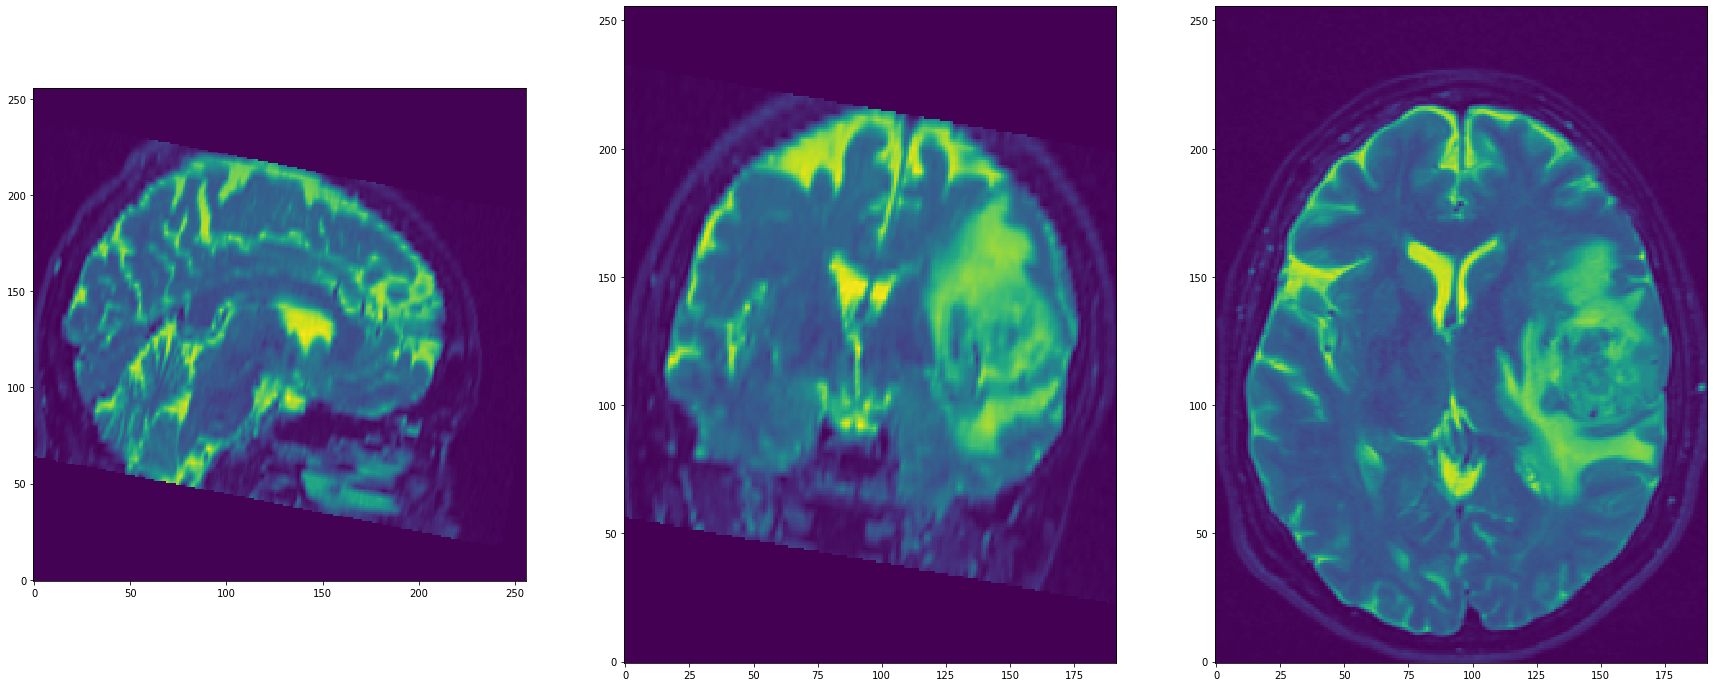

In [167]:
show_slices(mr426_t2f)

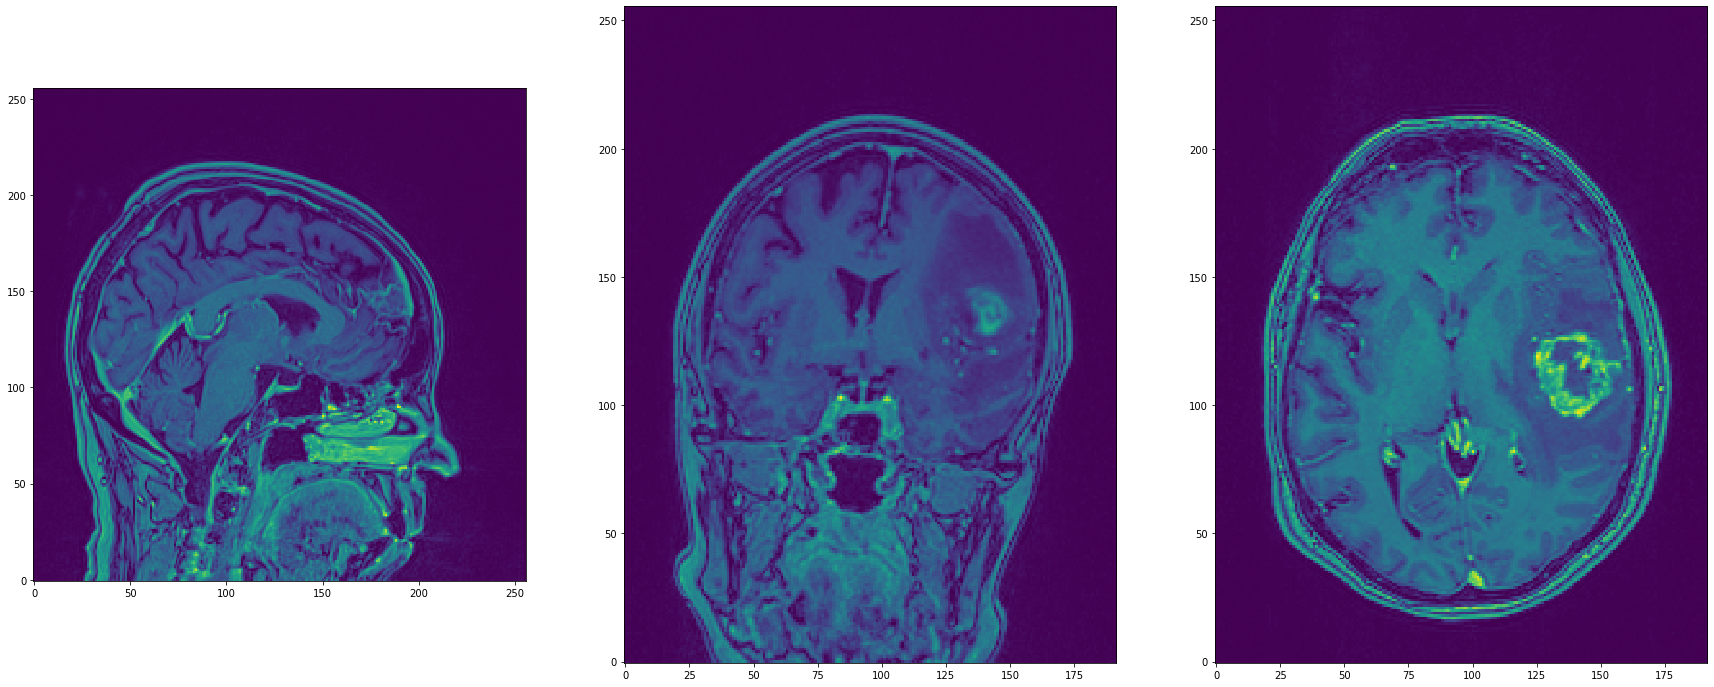

In [168]:
show_slices(mr426_t1c)

In [170]:
t2_flair_ukb = os.listdir('/mnt/projects/ukbiobank/original/imaging/brain_mri/T2_FLAIR_structural_brain_mri/archive/')

In [173]:
t1_str_ukb = os.listdir('/mnt/projects/ukbiobank/original/imaging/brain_mri/T1_structural_brain_mri/archive/')

In [171]:
len(t2_flair_ukb)

46571

In [174]:
len(t1_str_ukb)

47389

In [ ]:
#10: 'Left-Thalamus-Proper 40
#,11: 'Left-Caudate 30
#,12: 'Left-Putamen 40
#,13: 'Left-Pallidum 40
#,16: 'Brain-Stem /4th Ventricle 40
#,17: 'Left-Hippocampus 30
#,18: 'Left-Amygdala 50
#,26: 'Left-Accumbens-area 50
#,49: 'Right-Thalamus-Proper 40
#,50: 'Right-Caudate 30
#,51: 'Right-Putamen 40
#,52: 'Right-Pallidum 40
#,53: 'Right-Hippocampus 30
#,54: 'Right-Amygdala 50
#,58: 'Right-Accumbens-area 50

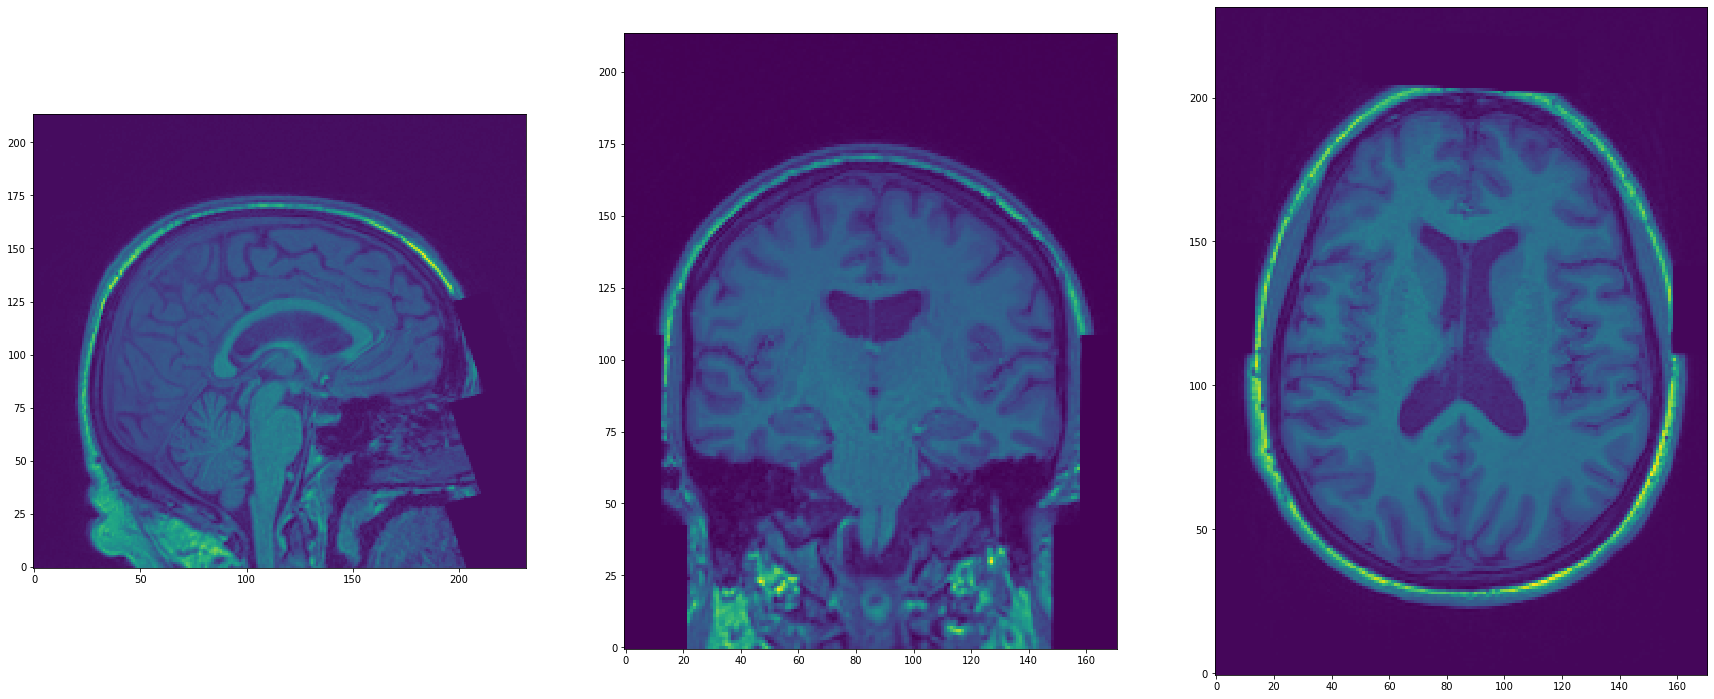

In [176]:
show_slices('/home/Shahryar.Khorasani/netstore/ukb_t1_and_t2f_example/T1/T1.nii.gz')

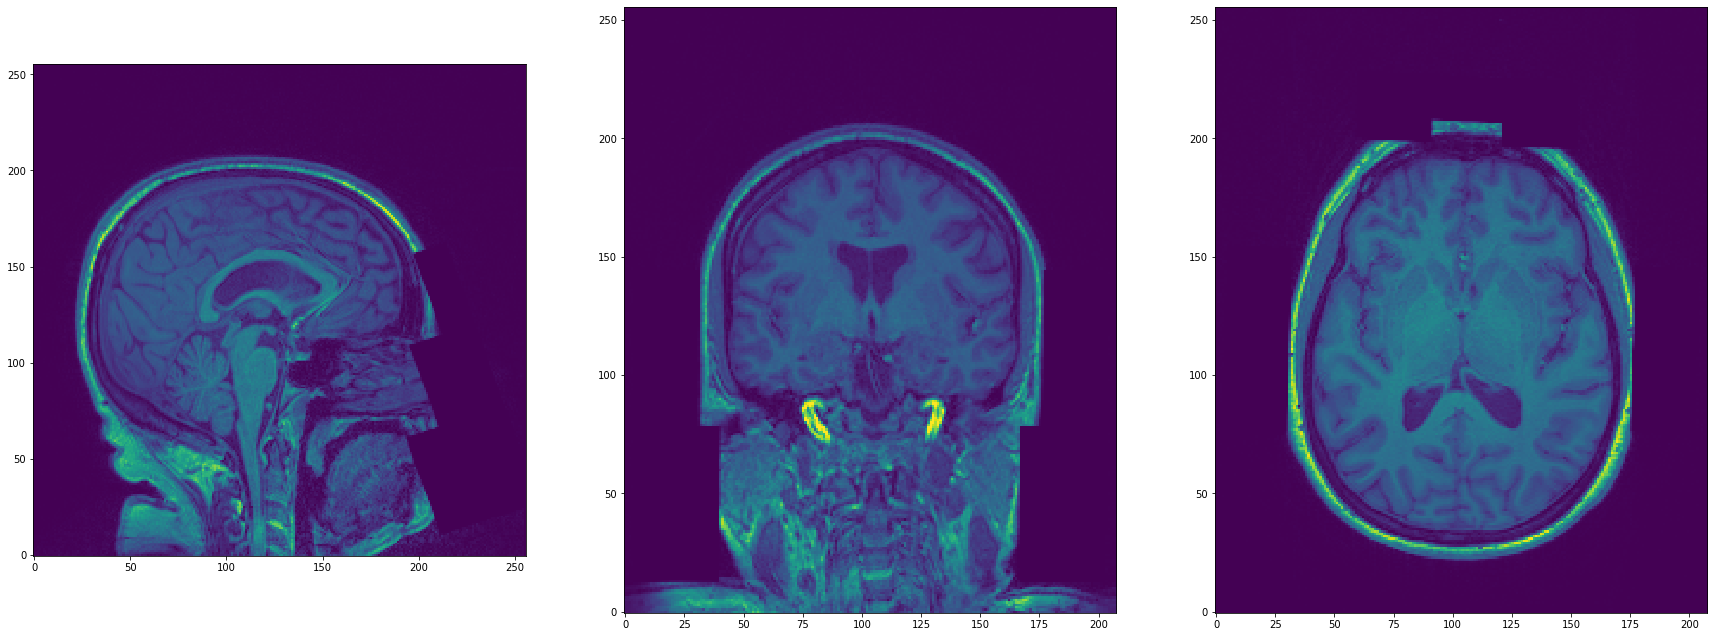

In [177]:
show_slices('/home/Shahryar.Khorasani/netstore/ukb_t1_and_t2f_example/T1/T1_orig_defaced.nii.gz')

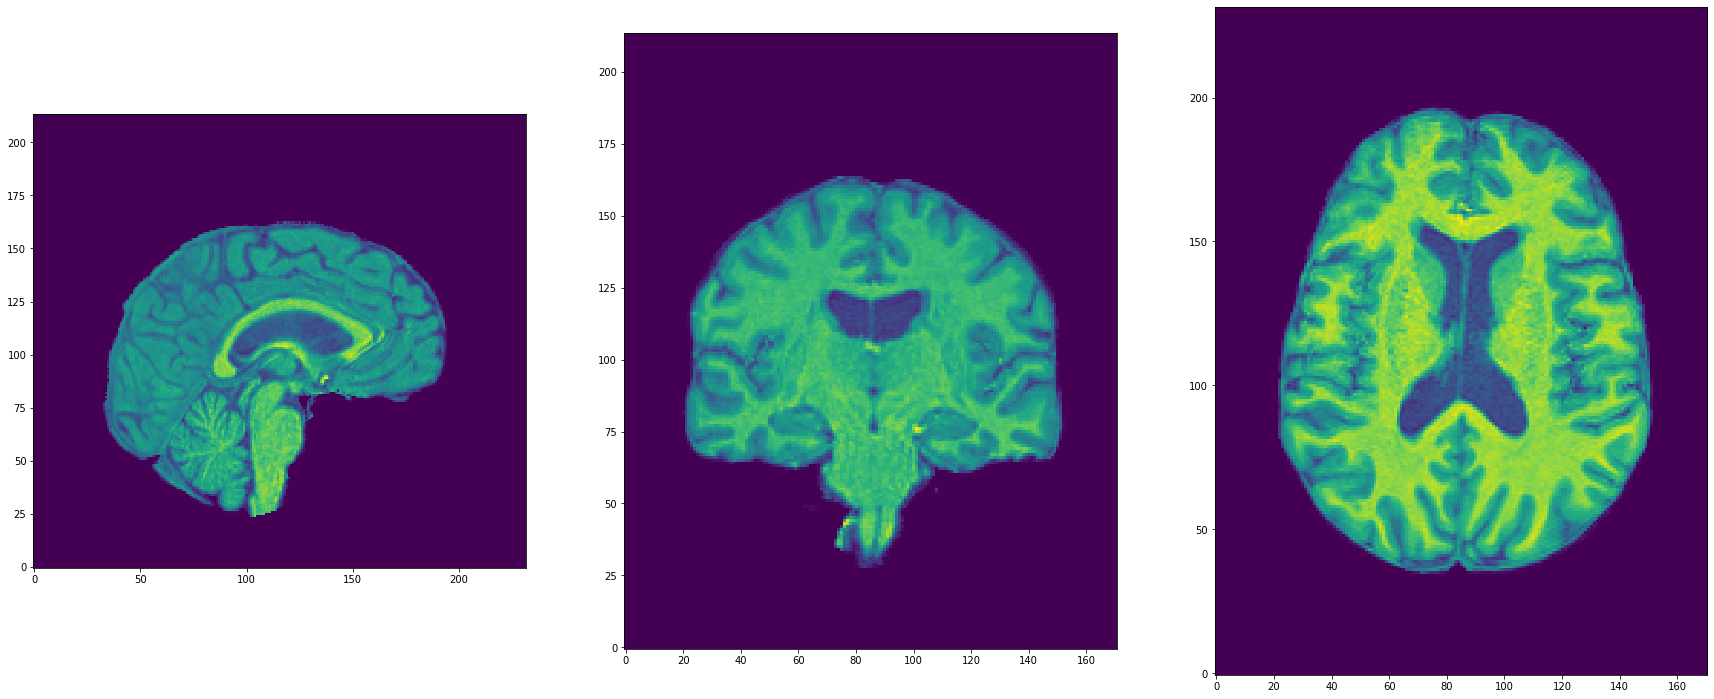

In [179]:
show_slices('/home/Shahryar.Khorasani/netstore/ukb_t1_and_t2f_example/T1/T1_unbiased_brain.nii.gz')

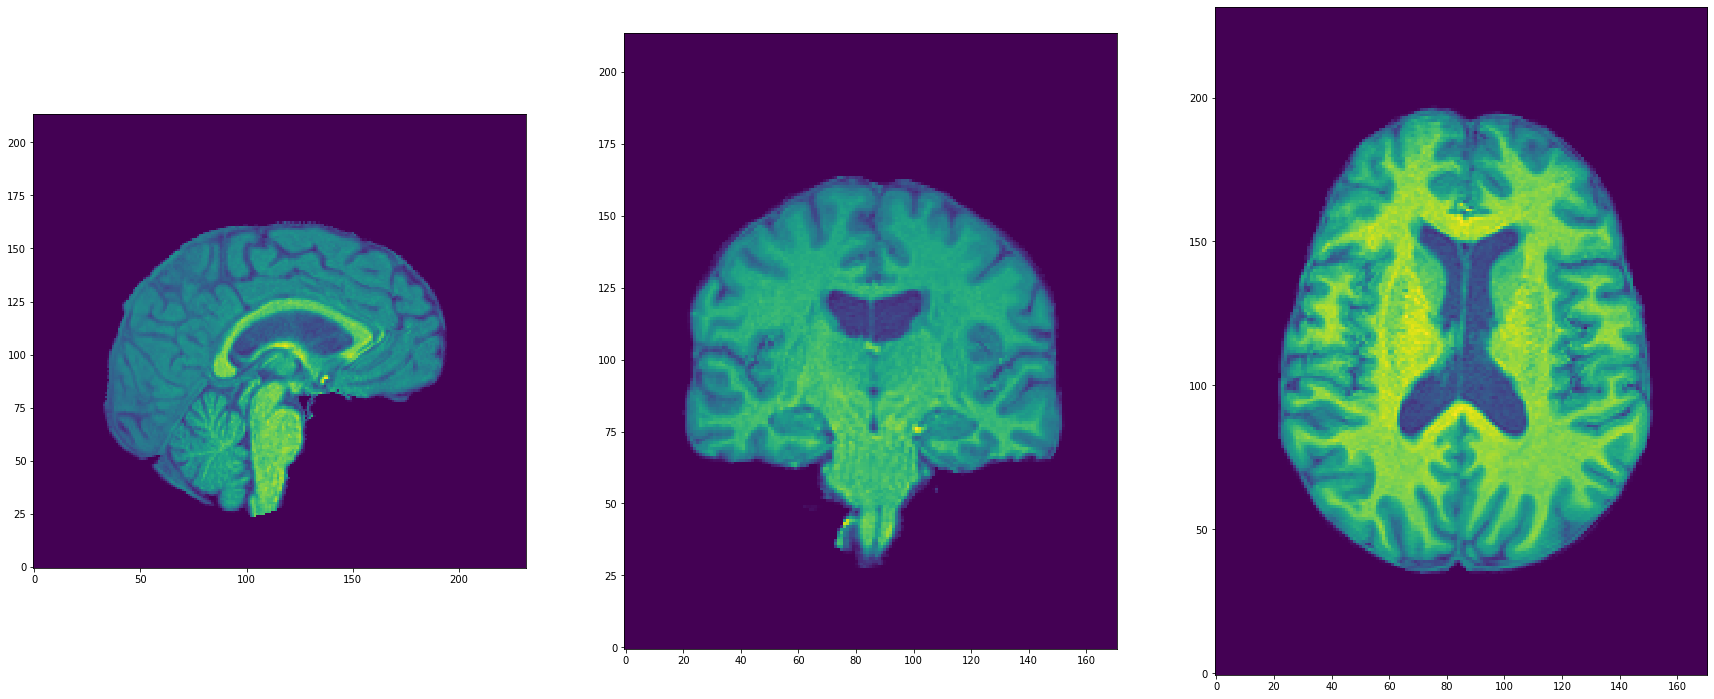

In [178]:
show_slices('/home/Shahryar.Khorasani/netstore/ukb_t1_and_t2f_example/T1/T1_brain.nii.gz')